## Implement K-means clustering algo from scratch in python

In [1]:
## Use core python and numpy
## Un-supervised ML method. No target variable, no X and y. Classification on unlabeled data points
## Assume certain number of clusters by finding centroid
## Multiple iterations (eg. <=200) to find centroid, or stop when no changes happen

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
array1 = [1, 3, 5, 7, 9, 12]
print(np.amin(array1))
print(np.amax(array1))
print(np.argmin(array1))

1
12
0


In [4]:
class KMeansClustering:
    # Constructor
    def __init__(self, k=3):
        self.k = k
        self.centroids = None
    
    @staticmethod
    def euclidean_distance(datapoint, centroids):
        return np.sqrt(np.sum((centroids - datapoint)**2, axis=1))
    
    
    def fit(self, X, max_iterations=2000):
        # STEP1: randomly initialize k centroids, for each dimension
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), \
                                           size=(self.k, X.shape[1]))
        
        ## use uniform distribution 
        ## amin: minimum of an array or minimum along an axis
        ## Centriod is an array of datapoints
        
        # STEP2: calclate the distance between each datapoint and the centroid generate in the beginning
        # Assigning to each datapoint the closest centroid
        # Reposition the centroid, so that it lies in the middle of all datapoints that belong to this group
        for _ in range(max_iterations):
            y = []
            
            for data_point in X:
                # calculate Euclidean distance, for n dimension data
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances) #argmin returns the index of the smallest value
                y.append(cluster_num)   
            y = np.array(y) # y is the group (total of k), each datapoint belongs to
            
            # reposition the centroid based on these labels
            cluster_indices = []
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))
            
            # reposition the centroid, record new centroids
            cluster_centers = []         
            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i]) # take current, no need to reposition
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0]) # indices are the data_points that are closed to the centroid, thus the same group

            # Inspect the maximum difference between existing centroids and the new centroids
            # If differene small enough, found the centroid sets already
            if np.max(self.centroids - np.array(cluster_centers)) < 0.001:
                break
            else:
                self.centroid = np.array(cluster_centers)
                
        return y        

In [5]:
random_points = np.random.randint(0, 100, (100,2))

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)

In [6]:
random_points

array([[90, 99],
       [ 4, 13],
       [22, 55],
       [52, 37],
       [53, 80],
       [ 7,  5],
       [10, 86],
       [25, 37],
       [78, 43],
       [37, 89],
       [29, 89],
       [14, 46],
       [40, 43],
       [88,  6],
       [68, 43],
       [11, 83],
       [88, 70],
       [ 8, 16],
       [89, 89],
       [48,  1],
       [16, 49],
       [71, 38],
       [ 9, 14],
       [24, 77],
       [85, 12],
       [42, 44],
       [26, 64],
       [23, 32],
       [98, 61],
       [67, 64],
       [34, 46],
       [32, 36],
       [41, 22],
       [54, 84],
       [46, 46],
       [67, 57],
       [81, 24],
       [ 8, 29],
       [67, 36],
       [91,  1],
       [94, 49],
       [50, 95],
       [66, 47],
       [25, 51],
       [70, 64],
       [72,  5],
       [25, 50],
       [21, 35],
       [ 4, 35],
       [51, 92],
       [53,  4],
       [ 4, 22],
       [48, 94],
       [76, 74],
       [53, 23],
       [20, 42],
       [ 1, 49],
       [15, 71],
       [21, 71

In [7]:
labels

array([0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0,
       2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2])

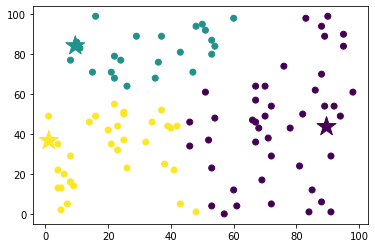

In [8]:
plt.scatter(random_points[:, 0], random_points[:, 1], c=labels) # color by labels
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)), marker="*", s=400) # color by no. of centroid
plt.show()

### Can use scikit-lean to get dataset

In [9]:
from sklearn.datasets import make_blobs
## Generate isotropic Gaussian blobs for clustering

/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
data = make_blobs(n_samples=100, n_features=2, centers=3)

In [11]:
data

(array([[-7.18979429,  3.18622741],
        [-2.54110598,  4.07072442],
        [-1.66538197,  3.7945901 ],
        [-6.7013867 ,  2.42950333],
        [-2.74505677,  3.1033446 ],
        [-4.3980401 ,  9.40268817],
        [-4.64724348, 10.83313338],
        [-4.63470005,  1.80265925],
        [-2.78223391,  4.65267479],
        [-6.90428744,  1.92149932],
        [-7.479332  ,  0.48246231],
        [-3.14933422,  4.38446939],
        [-7.88277917,  1.74289265],
        [-6.59784932,  1.04640023],
        [-2.36369629,  9.90595287],
        [-6.85151338,  2.57111814],
        [-3.07736795,  1.79045422],
        [-3.42350219,  5.15235187],
        [-4.5552742 ,  9.13014556],
        [-1.31117491,  5.09058871],
        [-4.11944358,  5.73113527],
        [-7.13516245,  0.30342114],
        [-4.20289882,  8.48524701],
        [-7.61259889,  1.17426117],
        [-5.14894049,  1.80388186],
        [-7.36250249,  1.79650808],
        [-7.14772562,  1.47525152],
        [-2.71857882,  2.145

In [12]:
data_points = data[0]

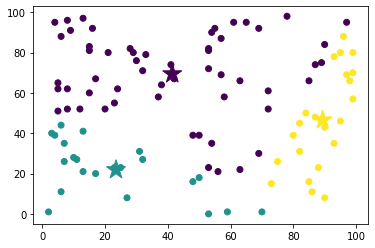

In [13]:
random_points = np.random.randint(0, 100, (100,2))

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)

plt.scatter(random_points[:, 0], random_points[:, 1], c=labels) # color by labels
plt.scatter(kmeans.centroid[:, 0], kmeans.centroid[:, 1], c=range(len(kmeans.centroids)), marker="*", s=400) # color by no. of centroid
plt.show()

## Confirm by computing Adjusted Rand Index (ARI) score
### The Adjusted Rand Index (ARI) is a measure of the similarity between two data clusterings. It is a correction of the Rand Index, which is a basic measure of similarity between two clusterings, but it has the disadvantage of being sensitive to chance. The Adjusted Rand Index takes into account the fact that some agreement between two clusterings can occur by chance, and it adjusts the Rand Index to account for this possibility.  
### It ranges from -1 to 1, where 1 indicates perfect agreement between the two clusterings, 0 indicates a random agreement and -1 indicates that the two clusterings are completely different.

In [14]:
print(data[1])

[1 2 2 1 2 0 0 2 2 1 1 2 1 1 0 1 2 2 0 2 2 1 0 1 1 1 1 2 0 2 1 0 1 1 2 0 0
 0 0 1 2 0 2 2 1 0 2 2 0 0 1 2 2 1 1 0 0 0 0 1 1 1 2 0 1 0 0 0 1 0 0 2 1 0
 1 0 0 1 0 1 0 2 2 2 2 0 1 2 2 2 1 0 1 2 2 2 0 2 0 1]


In [15]:
print(labels)

[1 0 0 0 1 0 0 1 0 2 1 0 0 0 2 2 0 1 0 2 0 0 1 0 1 0 2 0 2 0 2 0 1 1 2 0 0
 2 0 0 0 1 0 1 1 0 2 0 1 0 0 1 0 2 0 0 0 1 1 2 0 2 0 1 0 0 0 0 2 2 0 2 0 0
 0 0 0 2 1 0 0 2 0 0 1 0 0 1 0 2 1 2 2 0 0 0 2 0 1 0]


In [16]:
## Different names, but the clusterings are correct

In [17]:
from sklearn.metrics import adjusted_rand_score

In [18]:
ari = adjusted_rand_score(data[1], labels)

In [19]:
print(ari)

-0.007777207244110842
